# INDIVIDUAL COURSEWORK - W1842079

## Data Import via yfinance 

### Installing the yfinance package, which is the downloader connected with the Yahoo Fiannce API.

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

#### Downloading the data and save it as a pandas DataFrame

In [3]:
initial_data = yf.download("PEP ^VIX", start="2020-11-01", end="2021-11-01")

[*********************100%***********************]  2 of 2 completed


In [4]:
initial_data.head()

Adj Close                  Close                   High  \
                   PEP       ^VIX         PEP       ^VIX         PEP   
Date                                                                   
2020-11-02  130.384598  37.130001  135.149994  37.130001  136.229996   
2020-11-03  132.207932  35.549999  137.039993  35.549999  138.600006   
2020-11-04  132.999039  29.570000  137.860001  29.570000  141.699997   
2020-11-05  133.182343  27.580000  138.050003  27.580000  140.270004   
2020-11-06  133.500702  24.860001  138.380005  24.860001  139.770004   

                              Low                   Open              Volume  \
                 ^VIX         PEP       ^VIX         PEP       ^VIX      PEP   
Date                                                                           
2020-11-02  38.779999  133.779999  36.130001  135.610001  38.570000  3126400   
2020-11-03  36.439999  136.279999  34.189999  136.619995  36.439999  3293900   
2020-11-04  36.849998  137.660004  28.030001  139.000000  36.790001  4576300   
2020-11-05  28.139999  137.470001  26.040001  139.350006  27.559999  3667800   
2020-11-06  29.440001  137.330002  24.559999  138.559998  27.870001  2867000   

                 
           ^VIX  
Date             
2020-11-02    0  
2020-11-03    0  
2020-11-04    0  
2020-11-05    0  
2020-11-06    0

In [5]:
initial_data['Adj Close'].head()

,PEP,^VIX
Date,,
2020-11-02,130.384598,37.130001
2020-11-03,132.207932,35.549999
2020-11-04,132.999039,29.570000
2020-11-05,133.182343,27.580000
2020-11-06,133.500702,24.860001


#### Setting the Adj Closed data as a new DataFrame that we will use. 

In [6]:
data =  initial_data['Adj Close']
pep = data['PEP']
vix = data['^VIX']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-11-02 to 2021-10-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PEP     251 non-null    float64
 1   ^VIX    251 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [7]:
data.head()

,PEP,^VIX
Date,,
2020-11-02,130.384598,37.130001
2020-11-03,132.207932,35.549999
2020-11-04,132.999039,29.570000
2020-11-05,133.182343,27.580000
2020-11-06,133.500702,24.860001


In [8]:
data.tail()

,PEP,^VIX
Date,,
2021-10-25,158.151306,15.240000
2021-10-26,160.088226,15.980000
2021-10-27,159.531982,16.980000
2021-10-28,160.535202,16.530001
2021-10-29,160.515350,16.260000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

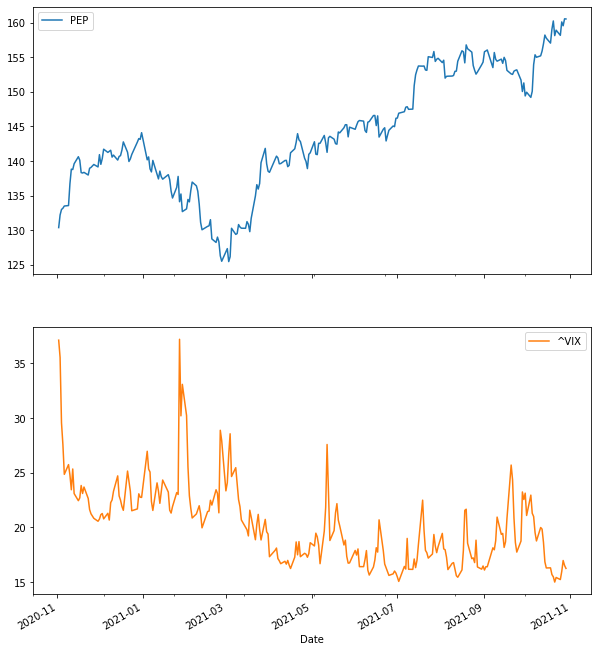

In [9]:
data.plot(figsize=(10,12), subplots=True)

### Summary Statistics 

In [10]:
data.describe().round(2)

,PEP,^VIX
count,251.00,251.00
mean,143.81,20.27
std,8.62,3.80
min,125.47,15.01
25%,138.40,17.25
50%,142.76,19.66
75%,152.53,22.49
max,160.54,37.21


### Changes over Time 

There are multiple options to calculate the changes in a time series over time, including absolute differences, percentage changes, and logarithmic (log) returns. 
First, the absolute differences, for which pandas provides a special method.

In [11]:
data.diff().head()

,PEP,^VIX
Date,,
2020-11-02,NaN,NaN
2020-11-03,1.823334,-1.580002
2020-11-04,0.791107,-5.980000
2020-11-05,0.183304,-1.990000
2020-11-06,0.318359,-2.719999


In [12]:
data.diff().describe().round(2)

,PEP,^VIX
count,250.00,250.00
mean,0.12,-0.08
std,1.26,1.94
min,-3.92,-7.00
25%,-0.56,-0.96
50%,0.12,-0.26
75%,0.87,0.74
max,4.11,14.19


From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data itself. Therefore, percentage changes are usually preferred. The following code derives the percentage changes or percentage returns (also: simple returns) in a financial context and visualizes their mean values per column.

In [13]:
data.pct_change().round(4).head()

,PEP,^VIX
Date,,
2020-11-02,NaN,NaN
2020-11-03,0.0140,-0.0426
2020-11-04,0.0060,-0.1682
2020-11-05,0.0014,-0.0673
2020-11-06,0.0024,-0.0986


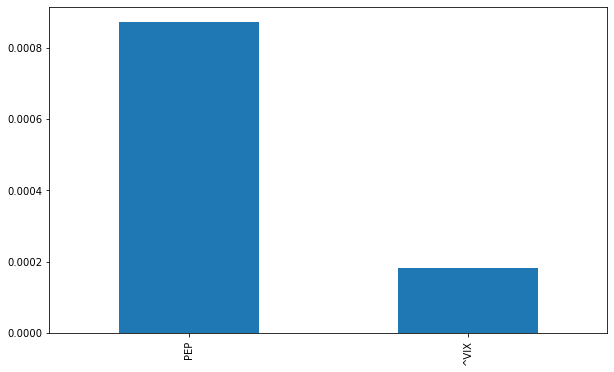

In [14]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

As an alternative to percentage returns, log returns can be used. In some scenarios, they are easier to handle and therefore often preferred in a financial context. 

In [15]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,PEP,^VIX
Date,,
2020-11-02,NaN,NaN
2020-11-03,0.0139,-0.0435
2020-11-04,0.0060,-0.1842
2020-11-05,0.0014,-0.0697
2020-11-06,0.0024,-0.1038


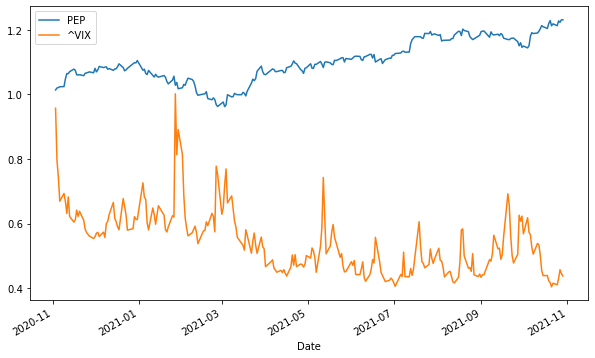

In [16]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

### Rolling Statistics 

It is financial tradition to work with rolling statistics, often also called financial indicators or financial studies. Such rolling statistics are basic tools for financial chartists and technical traders, for example. This section works with a single financial time series only.

In [17]:
sym = 'PEP'
PEP_data = pd.DataFrame(data[sym]).dropna()
PEP_data.tail()

,PEP
Date,
2021-10-25,158.151306
2021-10-26,160.088226
2021-10-27,159.531982
2021-10-28,160.535202
2021-10-29,160.515350


In [18]:
window = 10
PEP_data['min'] = data[sym].rolling(window=window).min()
PEP_data['mean'] = data[sym].rolling(window=window).mean()
PEP_data['std'] = data[sym].rolling(window=window).std()
PEP_data['median'] = data[sym].rolling(window=window).median()
PEP_data['max'] = data[sym].rolling(window=window).max()
PEP_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
PEP_data.dropna().head()

,PEP,min,mean,std,median,max,ewma
Date,,,,,,,
2020-11-13,139.607483,130.384598,134.976749,3.227194,133.534462,139.607483,139.355921
2020-11-16,140.620468,132.207932,136.000336,3.232121,135.145584,140.620468,140.304332
2020-11-17,140.118835,132.999039,136.791426,3.168261,137.745552,140.620468,140.165209
2020-11-18,138.324417,133.182343,137.323964,2.895836,138.546288,140.620468,138.784615
2020-11-19,138.266541,133.500702,137.832384,2.508282,138.546288,140.620468,138.396059


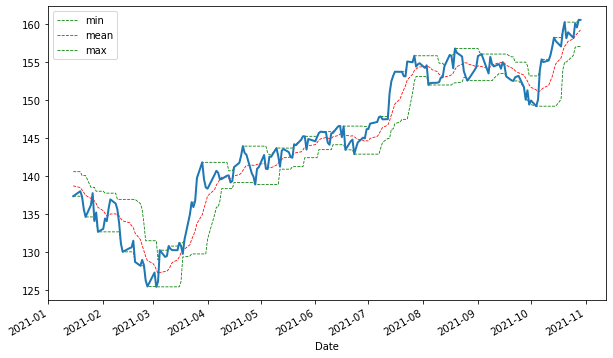

In [19]:
ax = PEP_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

Rolling statistics are a major tool in the so-called technical analysis of stocks, as compared to the fundamental analysis which focuses, for instance, on financial reports and the strategic positions of the company whose stock is being analysed. 

A decades-old trading strategy based on technical analysis is using two simple moving averages (SMAs). The idea is that the trader should go long on a stock (or financial instrument in general) when the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true. The concepts can be made precise with pandas and the capabilities of the DataFrame object. 

Rolling statistics are generally only calculated when there is enough data given the window parameter specification. 

In [20]:
PEP_data['SMA1'] = data[sym].rolling(window=20).mean()
PEP_data['SMA2'] = data[sym].rolling(window=60).mean()
PEP_data[[sym, 'SMA1', 'SMA2']].tail()

,PEP,SMA1,SMA2
Date,,,
2021-10-25,158.151306,154.976763,154.303059
2021-10-26,160.088226,155.479367,154.400967
2021-10-27,159.531982,155.892078,154.483850
2021-10-28,160.535202,156.448816,154.626531
2021-10-29,160.515350,156.977743,154.764606


<AxesSubplot:xlabel='Date'>

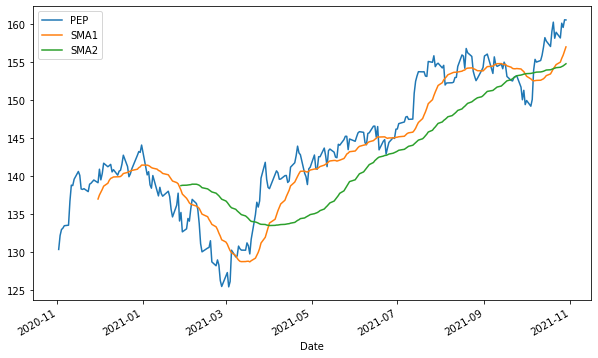

In [21]:
PEP_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

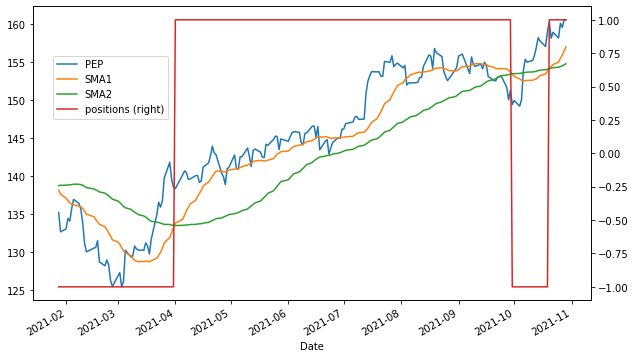

In [22]:
PEP_data.dropna(inplace=True)
PEP_data['positions'] = np.where(PEP_data['SMA1'] > PEP_data['SMA2'],1,-1)
ax = PEP_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

## Calculating Annualised Volatility & Market Volatility 

In [23]:
log_return = np.log(pep / pep.shift(1))

In [24]:
vol = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 14.13 %


In [25]:
vix= vix[-1]
print('The market volatility is', round(vix,2),'%')

The market volatility is 16.26 %


## Binomial Tree 

The Binomial options pricing model approach has been widely used since it is able to handle a variety of conditions for which other models cannot easily be applied. This is largely because the BOPM is based on the description of an underlying instrument over a period of time rather than a single point. 

The Binomial options pricing model approach has been widely used since it is able to handle a variety of conditions for which other models cannot easily be applied. This is largely because the BOPM is based on the description of an underlying instrument over a period of time rather than a single point. 

### Data Input 

Valuation is performed iteratively, starting at each of the final nodes (those that may be reached at the time of expiration), and then working backwards through the tree towards the first node (valuation date). The value computed at each stage is the value of the option at that point in time. 

In [26]:
pep[-1]

160.51535034179688

In [27]:
S0 = pep[-1]              # spot stock price
K =   150           # strike
T = 1.0               # maturity 
r =  0.0134             # risk free rate 
sig =  0.1626            # diffusion coefficient or volatility
N = 7                  # number of periods or number of time steps  
payoff = "call"          # payoff 

### Step 1: Create the binomial price tree 

The tree of prices is produced by working forward from valuation date to expiration.

At each step, it is assumed that the underlying instrument will move up or down by a specific factor ( u or d) per step of the tree (where, by definition, u ≥ 1 and 0 < d ≤ 1 ). So, if S is the current price, then in the next period the price will either be S_up = S u or S_down = S d. 

In [28]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [29]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [30]:
S

array([[160.51535034, 170.68958288, 181.50870707, 193.01359922,
        205.2477266 , 218.25731163, 232.09150654, 246.80257905],
       [  0.        , 150.94756962, 160.51535034, 170.68958288,
        181.50870707, 193.01359922, 205.2477266 , 218.25731163],
       [  0.        ,   0.        , 141.95009216, 150.94756962,
        160.51535034, 170.68958288, 181.50870707, 193.01359922],
       [  0.        ,   0.        ,   0.        , 133.4889241 ,
        141.95009216, 150.94756962, 160.51535034, 170.68958288],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        125.53209783, 133.4889241 , 141.95009216, 150.94756962],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 118.04955125, 125.53209783, 133.4889241 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 111.01301413, 118.04955125],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.       

In [31]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.5002198673618314

### Step 2: Find option value at each final node 

At each final node of the tree-i.e. at expiration of the option-the option value is simply its intrinsic, or exercise, value: Max[(S_n-K),0] for a call option and Max[(K-S_n),0] for a put option, where K is the strike price and S_n is the spot price of the underlying asset at the n-th period. 

In [32]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 96.80257905],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 68.25731163],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 43.01359922],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 20.68958288],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.94756962],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

### Step 3: Find option value at earlier nodes 

Once the above step is complete, the option value is then found for each node, starting at the penultimate time step, and working back to the first node of the tree (the valuation date) where the calculated result is the value of the option. 

### European Option 

In [33]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[17.25191388, 24.42235366, 33.44750575, 44.15778446, 56.10668636,
        68.8304994 , 82.37837473, 96.80257905],
       [ 0.        , 10.14130767, 15.48289419, 22.85603873, 32.36766684,
        43.58678699, 55.53459479, 68.25731163],
       [ 0.        ,  0.        ,  4.83390233,  8.16262259, 13.42367007,
        21.26277065, 31.79557526, 43.01359922],
       [ 0.        ,  0.        ,  0.        ,  1.52078608,  2.92824103,
         5.62913754, 10.80221854, 20.68958288],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.11792336,
         0.23619477,  0.47308666,  0.94756962],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [34]:
print('European ' + payoff, str( V[0,0]))

European call 17.251913881686786


## Black-Scholes Model 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

### European Options 

Non-Dividend Paying Options 

In [36]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [37]:
euro_option_bs(160.51, 150, 1, 0.0134, 0.1413, 'call')

16.33208207193907

In [38]:
S = np.linspace(50,250,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 150, 1, 0.0134, 0.1413, 'call')

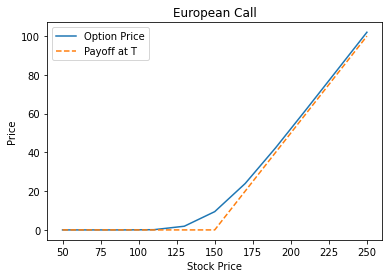

In [39]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-150,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

## Greeks 

Greeks are the sensitivity coefficients of the options prices to the changes in any of its variables. These sensitivity indicators are very important and there are different types of Greeks to measure the risk and sensitivity of different variables which affect the option prices. 

In [40]:
import scipy.stats as si

In [41]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [42]:
euro_option_bsm(160.51, 150, 1, 0.0134, 0, 0.1413, 'call')

16.33208207193907

In [43]:
euro_option_bsm(160.51, 150, 1, 0.0134, 0, 0.1413, 'put')

3.8254891203114454

In [44]:
S = np.linspace(50,250,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i],150, 1, 0.0134, 0, 0.1413, 'call')
    Put [i] = euro_option_bsm(S[i], 150, 1, 0.0134, 0, 0.1413, 'put')

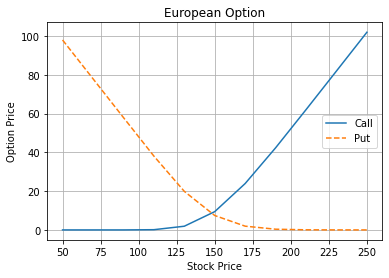

In [45]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

### Delta 

Delta is the most common used Greek letters and it measures the option price sensitivity to the changes in the price of the underlying stock. The Delta of a call option is always positive which means a variation in the price of the underlying stock implies a variation in the same direction as the price of the call option. Whereas, the value of a put option decreases if the price of the underlying stock increases, this means a negative delta.  

In [55]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [56]:
delta(160.51, 150, 1, 0.0134, 0, 0.1413, 'call')

0.74045682185953

In [57]:
delta(160.51, 150, 1, 0.0134, 0, 0.1413, 'put')

-0.25954317814047

In [58]:
S = np.linspace(50,250,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 150, 1, 0.0134, 0, 0.1413, 'call')
    Delta_Put [i] = delta(S[i], 150, 1, 0.0134, 0, 0.1413, 'put')

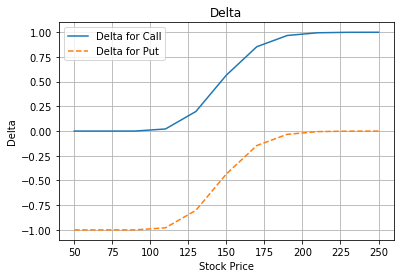

In [59]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

#### 3D Surface Graph of Delta

In [60]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [61]:
S = np.linspace(50, 250, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 150, T[i], 0.0134, 0, 0.1413, 'call')

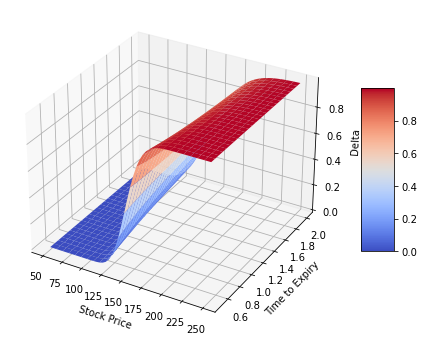

In [62]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [63]:
d = delta(160.51, 150, 1, 0.0134, 0, 0.1413, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.7405 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.7405 .


### Gamma 

Gamma measures the delta sensitivity to change in the underlying stock. Gamma is identical for call and put option as well and can be positive or negative. Gamma presents values close to zero when the option is out of the money or in the money and the maximum value when the option is at the money especially when the time to maturity is reduced. 

In [64]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [65]:
gamma(160.51, 150, 1, 0.0134, 0, 0.1413, 'call')

0.014288805099379263

In [66]:
gamma(160.51, 150, 1, 0.0134, 0, 0.1413, 'put')

0.014288805099379263

In [67]:
S = np.linspace(50,250,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 150, 1, 0.0134, 0, 0.1413, 'call')

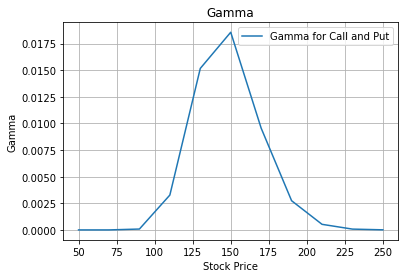

In [68]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

#### 3D Surface Graph of Gamma 

In [69]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [70]:
S = np.linspace(50, 250, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 150, T[i], 0.0134, 0, 0.1413, 'call')

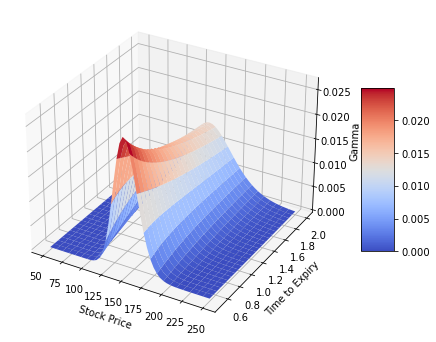

In [71]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Speed 

Speed measures the rate of change in Gamma with respect to changes in the underlying price. 

In [72]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [73]:
speed(160.51, 150, 1, 0.0134, 0, 0.1413, 'call')

-0.0004952269369850919

In [74]:
speed(160.51, 150, 1, 0.0134, 0, 0.1413, 'put')

-0.0004952269369850919

In [75]:
S = np.linspace(50,250,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 150, 1, 0.0134, 0, 0.1413, 'call')

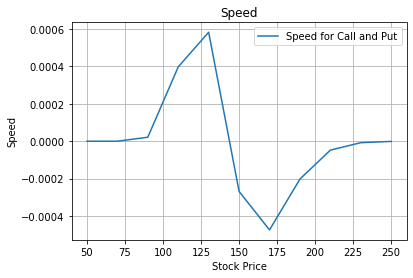

In [76]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

### 3D Surface Graph of Speed

In [77]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [78]:
S = np.linspace(50, 250, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 150, T[i], 0.0134, 0, 0.1413, 'call')

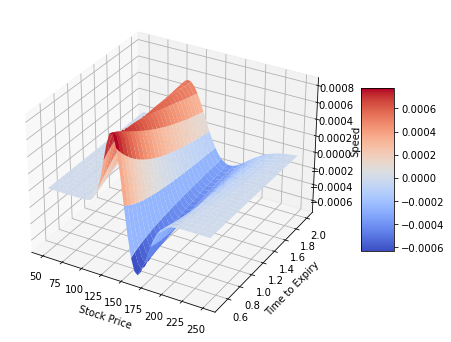

In [79]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Theta 

Theta measures the sensitivity of price change over time, while the other parameters remain the same i.e. constant. Theta in most cases a negative parameter because as the maturity approaches, option value tends to decrease. 

In [80]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [81]:
theta(160.51, 150, 1, 0.0134, 0, 0.1413, 'call')

5.048725154743543

In [82]:
theta(160.51, 150, 1, 0.0134, 0, 0.1413, 'put')

4.284471192744859

In [83]:
T = np.linspace(0.1413,7,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(161.51, 150, T[i], 0.0134, 0, 0.1413, 'call')
    Theta_Put [i] = theta(161.51, 150, T[i], 0.0134, 0, 0.1413, 'put')

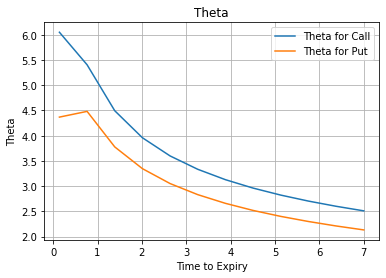

In [84]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

### 3D Surface Graph of Theta 

In [85]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [86]:
S = np.linspace(50, 250, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 150, T[i], 0.0134, 0, 0.1413, 'call')

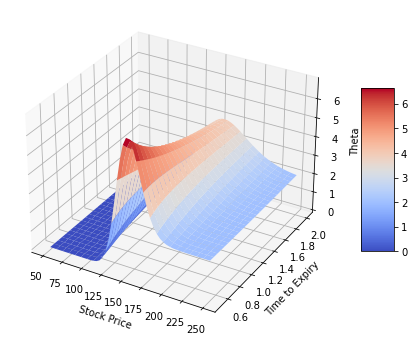

In [87]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Rho 

Rho measures the sensitivity of the option value of interest rate and it is calculated as the first derivative of option price to interest rate. For a call option the value of Rho is always positive, whereas in case of put option it is negative. 

In [88]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [89]:
rho(160.51, 150, 1, 0.0134, 0, 0.1413, 'call')

102.51864240473408

In [90]:
rho(160.51, 150, 1, 0.0134, 0, 0.1413, 'put')

-45.484764643638286

In [91]:
r = np.linspace(0,0.0134,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(160.51, 150, 1, r[i], 0, 0.1413, 'call')
    Rho_Put [i] = rho(160.51, 150, 1, r[i], 0, 0.1413, 'put')

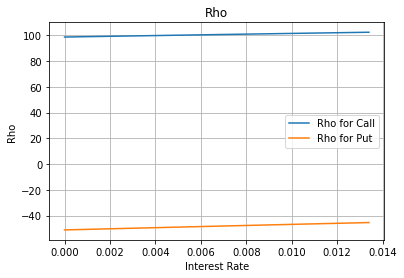

In [92]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

### 3D Surface Graph of Rho 

In [93]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [94]:
S = np.linspace(50, 250, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 150, T[i], 0.0134, 0, 0.1413, 'call')

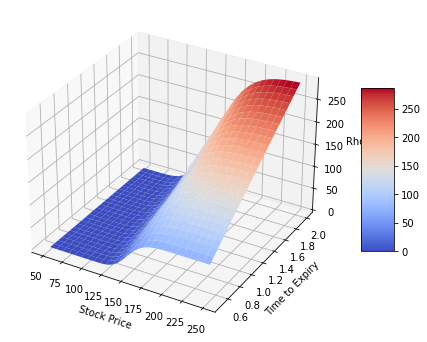

In [95]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Vega 

Vega measures the sensitivity to volatility. Vega is the Derivative of the option value with respect to the volatility of the underlying asset. The value of Vega for the call option as well as the put option is the same.

In [96]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [97]:
vega(160.51, 150, 1, 0.0134, 0, 0.1413, 'call')

52.01663618570568

In [98]:
vega(160.51, 150, 1, 0.0134, 0, 0.1413, 'put')

52.01663618570568

In [99]:
vol = np.linspace(0.1,0.1413,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(160.51, 150, 1, 0.0134, 0, vol[i], 'call')

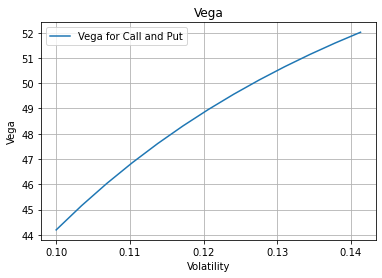

In [100]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

### 3D Surface Graph of Vega 

In [101]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [102]:
S = np.linspace(50, 250, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 150, T[i], 0.0134, 0, 0.1413, 'call')

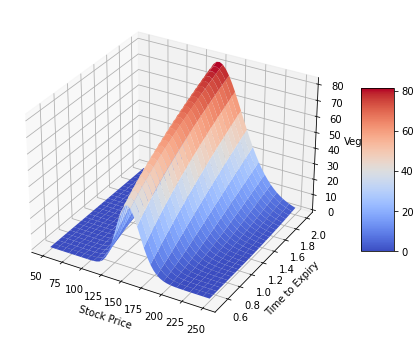

In [103]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [104]:
v = vega(160.51, 150, 1, 0.0134, 0, 0.1413, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 52.0166 . If the volatility increases 1%, then the value of the option will increase $ 0.520166 .
